# 多变量线性回归

## 一个房屋价格数据集，其中有两个特征x（房子的大小和卧室的数量）和目标：房子的价格

## 使用特征缩放进行数据分析，缩小迭代次数

主要设计如何进行数据缩放，以及如何绘制3D图

### 导入训练数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/liuming/.ipynb_checkpoints/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['size', 'bedrooms', 'Price'])
data.head()

,size,bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


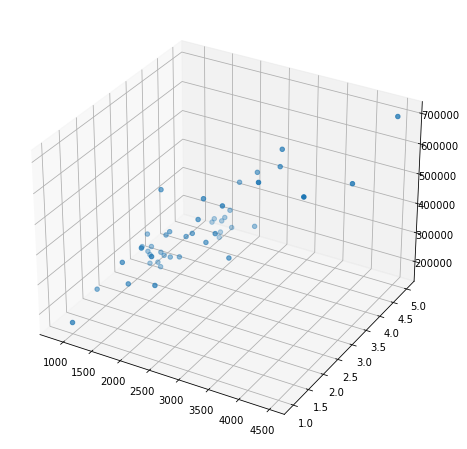

In [3]:
fig = plt.figure(figsize=(12, 8))  # figure()创建画布
ax = fig.gca(projection='3d') # 画布中创建3D子图
size = data.iloc[:,0:1]
ax.scatter(size, data.bedrooms, data.Price)

### 对数据进行特征缩放

特征缩放需要用到两个数据：1.没列数据的平均值。2.每列数据的标准差
df.mean(axis=0)压缩行，求每列的平均值，返回series类型数据
df.std(axis=0)求每列数据的标准差，反应数据集的离散程度

In [4]:
data.mean()

size          2000.680851
bedrooms         3.170213
Price       340412.659574
dtype: float64

In [5]:
data = (data - data.mean()) / data.std() # 特征缩放
data.head()

,size,bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


data = (data - data.mean()) / data.std() 此代码，简洁的实现了一整个数据集特征缩放，牢记！！   
data为dateframe类型，data.mean()为series类型，他们相减，时将data每一个数据都与series对应的数据相减   
特征缩放有很多形式，这里使用的是除以标准差的方法。

### 对数据集预处理，完成代价函数与梯度下降（与单变量线性回归相同）

In [6]:
data.insert(0 ,'ones', 1)
col = data.shape[1]  # 1为行，0为列
X = data.iloc[:, 0:col-1]
y = data.iloc[:,col-1:col]
X = np.matrix(X.values) # 注意将dataframe类型的直接放入函数运算，一点要先取valus转换橙矩阵
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

def costFounction(X, y, theta):
    """代价函数"""
    sum = ((X * theta.T) - y).T * ((X * theta.T) - y)
    return sum / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    """梯度下降算法
    alpha：学习率
    iters：迭代次数
    theta：为最初设置的模型参数
    """
    cost = np.zeros(iters) # 构造一个矩阵，用来接收每次迭代的代价值，以便后面进行直观观察
    m = len(X)  # m是样本的个数，也就是x的长度
    for i in range(iters):  # 循环迭代，注意这里for循环的用法，range()返回一个可迭代的对象
        theta = theta - (alpha / m) * (X * theta.T - y).T * X
        # 注意这个也是用矩阵代替复杂运算，(X * theta.T).T * X：跟上面的代价函数一样都是用两个矩阵相乘直接算出了sum（其中一个要进行转置）
        cost[i] = costFounction(X, y, theta)
    return theta, cost 

alpha = 0.1
iters = 1000
final_theta, cost = gradientDescent(X, y, theta, alpha, iters)
final_theta

matrix([[-1.09792199e-16,  8.84765988e-01, -5.31788197e-02]])

### 可视化表示

In [7]:
size = data.iloc[:,1:2]
size = np.matrix(size.values)  # 必须要转换一下，要不然x1时多维的
x1 = np.linspace(size.min(), size.max(), 200)
x2 = np.linspace(data.bedrooms.min(), data.bedrooms.max(), 200)

h = final_theta[0,0] + final_theta[0,1] * x1 +final_theta[0,2] * x2 # 多变量线性回归

[Text(0.5, 0, 'size'), Text(0.5, 0, 'bedrooms'), Text(0.5, 0, 'Price')]

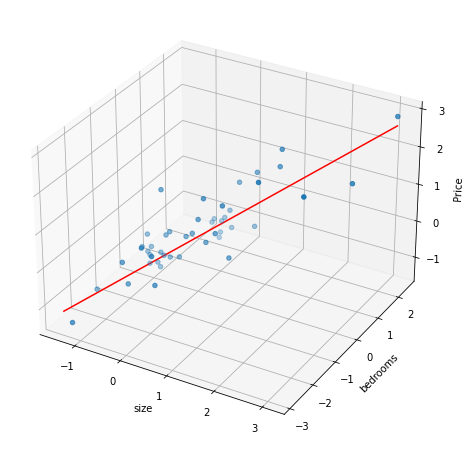

In [8]:
fig = plt.figure(figsize=(12, 8))  # figure()创建画布
ax = fig.gca(projection='3d') # 画布中创建3D子图
ax.scatter(size, data.bedrooms, data.Price)
ax.plot(x1, x2, h, 'r')
ax.set(xlabel='size', ylabel='bedrooms', zlabel='Price')

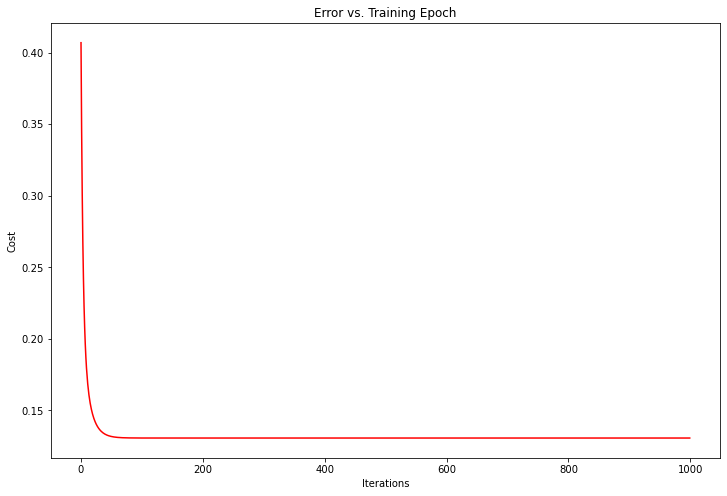

In [9]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()          # 另一种创建画布与子图的方式
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()